# Linear Model must have data----Abalone final

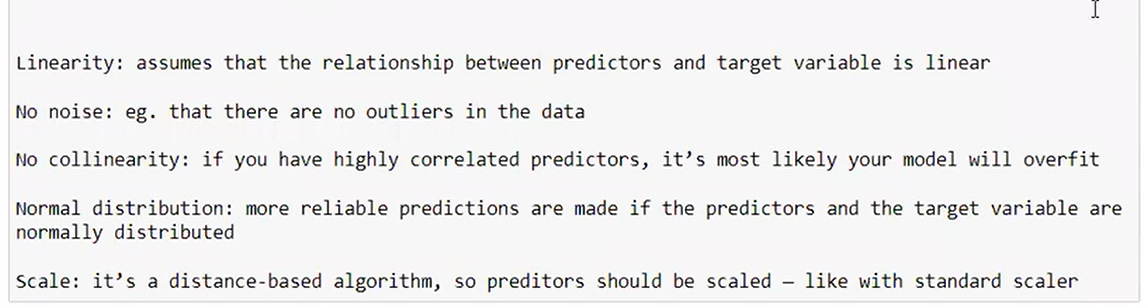

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Abalone.csv')
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [3]:
df.sample(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2202,M,0.570,0.405,0.160,0.9245,0.3445,0.2185,0.295,19
48,I,0.325,0.245,0.070,0.1610,0.0755,0.0255,0.045,6
2663,M,0.570,0.450,0.135,1.0200,0.5460,0.2040,0.250,9


In [4]:
df.tail(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
df=pd.DataFrame(data=df)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
df.shape

(4177, 9)

In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

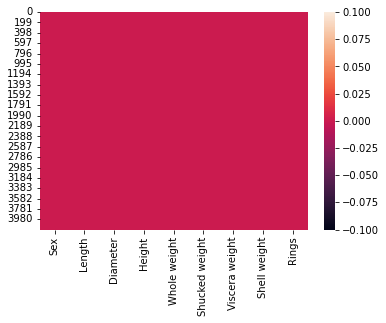

In [9]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

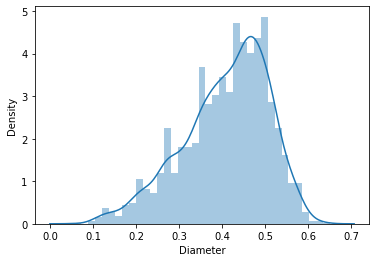

In [10]:
sns.distplot(df['Diameter'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

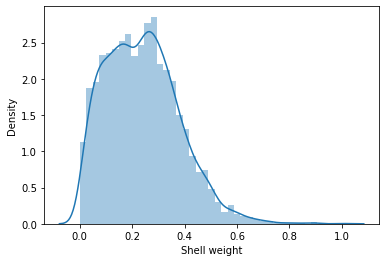

In [11]:
sns.distplot(df['Shell weight'])

In [12]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [13]:
df.iloc[:,0]

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [14]:
lencode=LabelEncoder()
df['Sex']=lencode.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


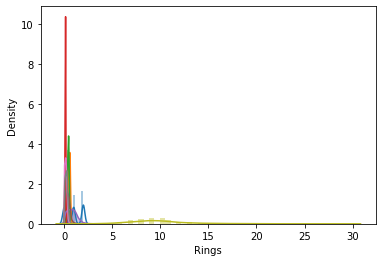

In [15]:
for i in df.columns:
    sns.distplot(df[i])

<AxesSubplot:xlabel='Height', ylabel='Density'>

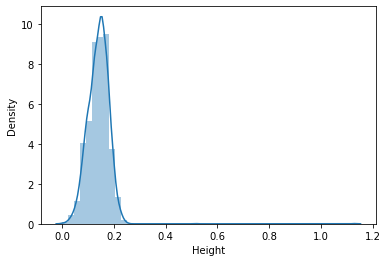

In [16]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Height', ylabel='Count'>

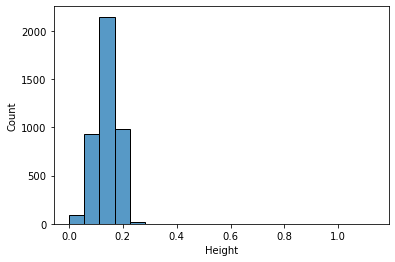

In [17]:
sns.histplot(df['Height'],bins=20)

<AxesSubplot:xlabel='Rings', ylabel='Count'>

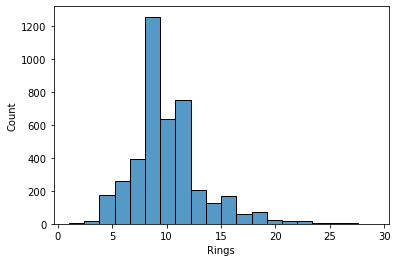

In [18]:
sns.histplot(df['Rings'],bins=20)

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

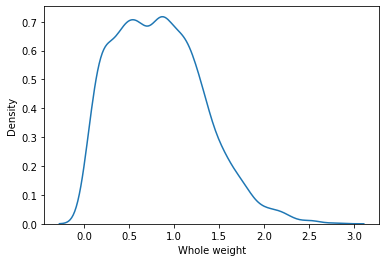

In [19]:
sns.kdeplot(df['Whole weight'])

<AxesSubplot:xlabel='Shell weight', ylabel='Height'>

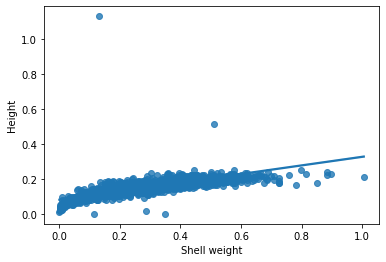

In [20]:
sns.regplot(x="Shell weight", y='Height',data=df)

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

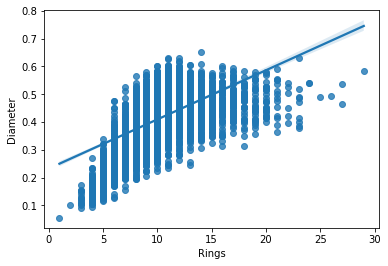

In [21]:
sns.regplot(x="Rings", y='Diameter',data=df)

<AxesSubplot:xlabel='Whole weight', ylabel='Diameter'>

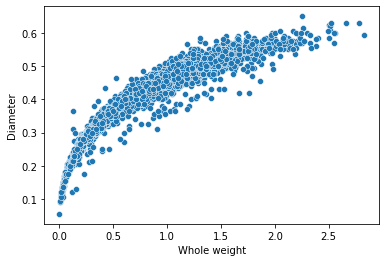

In [22]:
sns.scatterplot(x='Whole weight',y='Diameter',data=df)

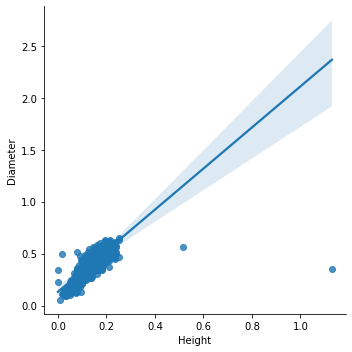

In [23]:
sns.lmplot(x='Height',y='Diameter',data=df)

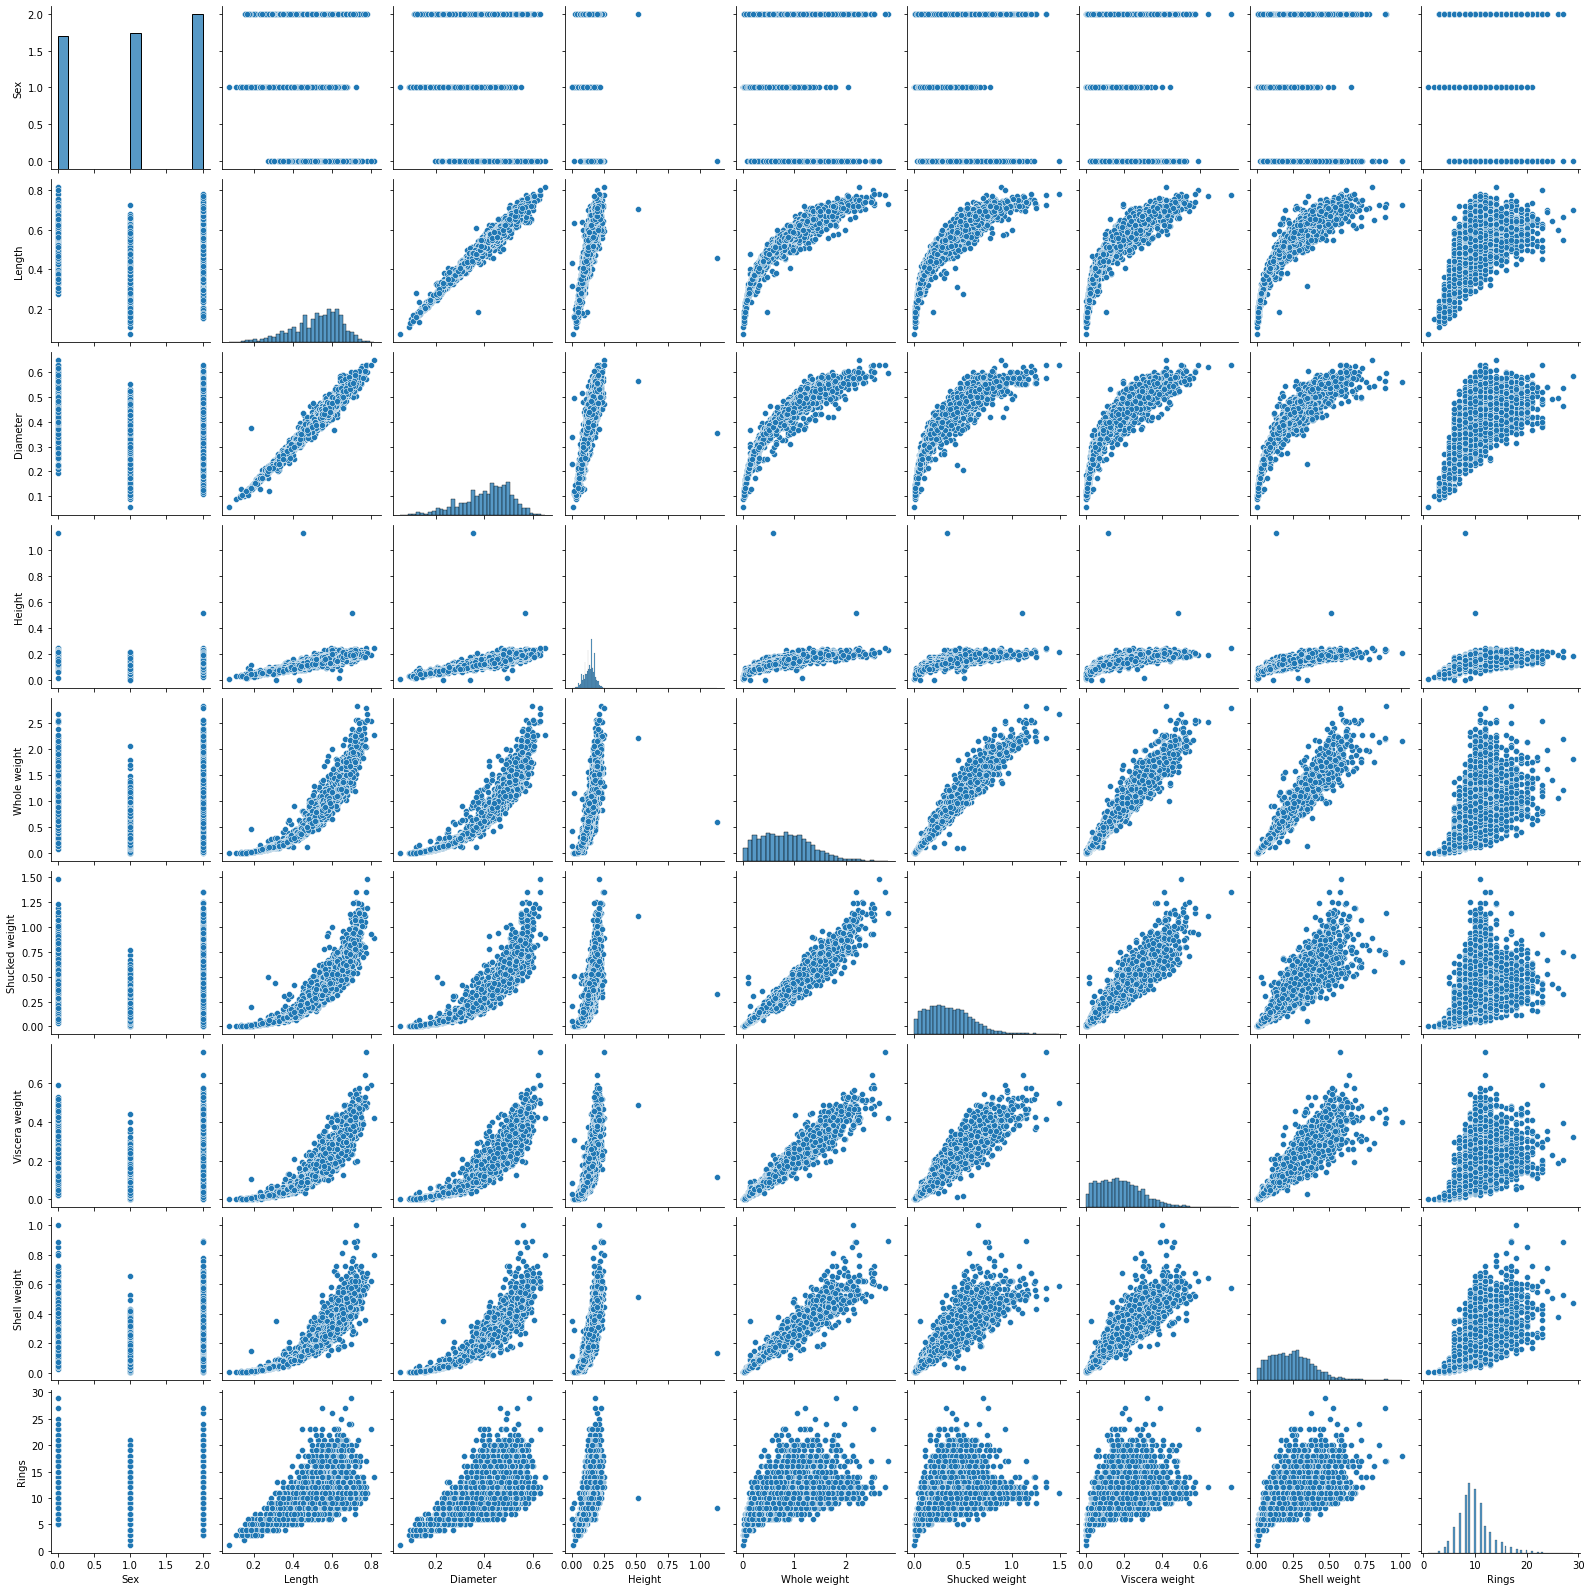

In [24]:
sns.pairplot(df)

In [25]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


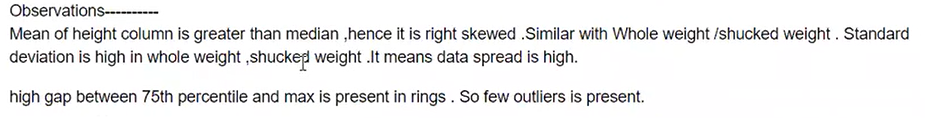

In [26]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [27]:
import numpy as np

#df['Height']=np.log(df['Height'])

df['Height']=np.sqrt(df['Height'])
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height           -0.295641
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Count'>

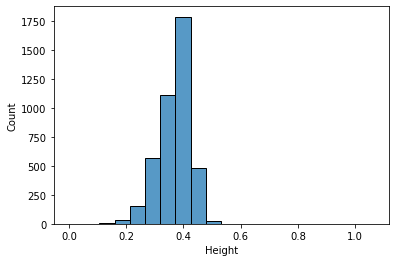

In [28]:
sns.histplot(df['Height'],bins=20)

In [29]:
# delecting outliers

from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        237,  238,  238,  238,  239,  239,  270,  275,  277,  278,  294,
        306,  310,  313,  314,  334,  351,  355,  358,  358,  362,  375,
        416,  417,  428,  431,  433,  469,  478,  480,  501,  526,  526,
        530,  572,  628,  673,  674,  675,  678,  694,  694,  696,  696,
        718,  719,  719,  719,  720,  720,  720,  744,  754,  756,  811,
        891,  891,  891, 1048, 1051, 1051, 1052, 1174, 1193, 1197, 1199,
       1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257,
       1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429,
       1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762, 1763,
       1763, 1763, 1821, 1982, 1986, 1987, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2114, 2157, 2161, 2169, 2171, 2172, 2176, 2180,
       2199, 2201, 2208, 2209, 2274, 2275, 2305, 2

In [30]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

df=dfnew

dfnew.shape= (4019, 9)


In [31]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.043978,-0.046893,-0.047602,-0.034812,-0.016429,-0.045187,-0.043998,-0.033682
Length,-0.043978,1.000000,0.985807,0.907285,0.935022,0.909742,0.908448,0.914874,0.563535
Diameter,-0.046893,0.985807,1.000000,0.912648,0.934606,0.904681,0.904582,0.922138,0.581657
Height,-0.047602,0.907285,0.912648,1.000000,0.882321,0.835174,0.860207,0.889508,0.616311
Whole weight,-0.034812,0.935022,0.934606,0.882321,1.000000,0.970881,0.966476,0.961026,0.545911
Shucked weight,-0.016429,0.909742,0.904681,0.835174,0.970881,1.000000,0.929837,0.895712,0.437522
Viscera weight,-0.045187,0.908448,0.904582,0.860207,0.966476,0.929837,1.000000,0.919089,0.520584
Shell weight,-0.043998,0.914874,0.922138,0.889508,0.961026,0.895712,0.919089,1.000000,0.620817
Rings,-0.033682,0.563535,0.581657,0.616311,0.545911,0.437522,0.520584,0.620817,1.000000


<AxesSubplot:>

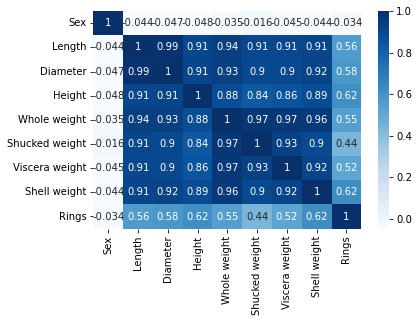

In [32]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
x=df.iloc[:,0:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.406202,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.367423,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.452769,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.387298,1.0945,0.5310,0.2610,0.2960


In [35]:
y=df.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4019, dtype: int64

In [36]:
x.shape

(4019, 8)

In [37]:
x.shape[1]

8

In [38]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF_Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [39]:
vif_calc()

   VIF_Factor        features
0    2.632493             Sex
1  802.340579          Length
2  763.963727        Diameter
3  154.948351          Height
4  441.891678    Whole weight
5  110.275122  Shucked weight
6   65.499021  Viscera weight
7   92.744708    Shell weight


In [40]:
df.drop(['Length','Shucked weight'],axis=1,inplace=True)
df

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.308221,0.5140,0.1010,0.1500,15
1,2,0.265,0.300000,0.2255,0.0485,0.0700,7
2,0,0.420,0.367423,0.6770,0.1415,0.2100,9
3,2,0.365,0.353553,0.5160,0.1140,0.1550,10
4,1,0.255,0.282843,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.406202,0.8870,0.2390,0.2490,11
4173,2,0.440,0.367423,0.9660,0.2145,0.2605,10
4174,2,0.475,0.452769,1.1760,0.2875,0.3080,9
4175,0,0.485,0.387298,1.0945,0.2610,0.2960,10


In [41]:
x=df.iloc[:,:-1]
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,0.365,0.308221,0.5140,0.1010,0.1500
1,2,0.265,0.300000,0.2255,0.0485,0.0700
2,0,0.420,0.367423,0.6770,0.1415,0.2100
3,2,0.365,0.353553,0.5160,0.1140,0.1550
4,1,0.255,0.282843,0.2050,0.0395,0.0550
...,...,...,...,...,...,...
4172,0,0.450,0.406202,0.8870,0.2390,0.2490
4173,2,0.440,0.367423,0.9660,0.2145,0.2605
4174,2,0.475,0.452769,1.1760,0.2875,0.3080
4175,0,0.485,0.387298,1.0945,0.2610,0.2960


In [42]:
x.shape

(4019, 6)

In [43]:
vif_calc()

   VIF_Factor        features
0    2.623184             Sex
1  207.507326        Diameter
2  131.432133          Height
3  140.572357    Whole weight
4   60.762342  Viscera weight
5   58.911776    Shell weight


<AxesSubplot:>

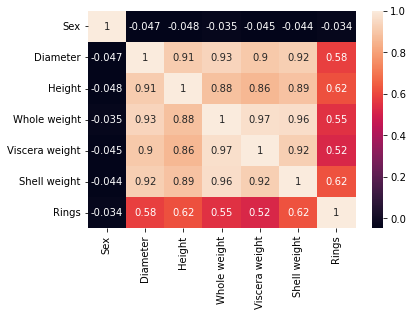

In [44]:
sns.heatmap(df.corr(),annot=True)

In [45]:
y.shape

(4019,)

In [46]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.15835802, -0.42766545, -1.1645936 , -0.63693837, -0.7267137 ,
        -0.63462928],
       [ 1.15835802, -1.4770503 , -1.32420851, -1.27043818, -1.23554834,
        -1.26104553],
       [-1.28480172,  0.14949622, -0.01509984, -0.27901646, -0.33418412,
        -0.1648171 ],
       ...,
       [ 1.15835802,  0.72665788,  1.64199279,  0.81670767,  1.08086078,
         0.60254279],
       [-1.28480172,  0.83159637,  0.37079505,  0.63774671,  0.82402043,
         0.50858036],
       [ 1.15835802,  1.56616576,  1.4248959 ,  2.51299401,  1.94345664,
         2.06679076]])

In [47]:
x.shape

(4019, 6)

In [48]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=55)

In [49]:
xtrain.shape

(2813, 6)

In [50]:
ytrain.shape

(2813,)

In [51]:
xtest.shape

(1206, 6)

In [52]:
ytest.shape

(1206,)

In [53]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_

array([ 0.00840657,  0.36149019,  1.02282032, -2.76538666,  0.13076611,
        3.07787733])

In [54]:
features=['Sex','Diameter','Height','While weight','Viscera weight','Shell weight']
list(zip(lr.coef_,features))

[(0.008406569042268766, 'Sex'),
 (0.36149018863995214, 'Diameter'),
 (1.022820321238085, 'Height'),
 (-2.765386661105307, 'While weight'),
 (0.13076611122676382, 'Viscera weight'),
 (3.077877328125384, 'Shell weight')]

In [55]:
cfdf=pd.DataFrame(data=lr.coef_,index=features)
cfdf

,0
Sex,0.008407
Diameter,0.361490
Height,1.022820
While weight,-2.765387
Viscera weight,0.130766
Shell weight,3.077877


In [56]:
lr.intercept_

9.780269356675209

In [57]:
lr.score(xtrain,ytrain)

0.46367716121560787

In [58]:
pred=lr.predict(xtest)
pred

array([12.11331063, 11.61504384,  9.61650377, ..., 10.38679789,
        9.70195901, 10.88035602])

In [59]:
print("Predicted values",pred)

Predicted values [12.11331063 11.61504384  9.61650377 ... 10.38679789  9.70195901
 10.88035602]


In [61]:
preddf=pd.DataFrame(data=pred)
preddf

,0
0,12.113311
1,11.615044
2,9.616504
3,10.017946
4,10.587250
...,...
1201,5.959364
1202,11.950754
1203,10.386798
1204,9.701959


In [62]:
lr.score(xtest,ytest)

0.42899509023721416

In [63]:
print('Mean absolute error::',mean_absolute_error(ytest,pred))
print('Mean squared error::',mean_squared_error(ytest,pred))
print('Root mean square::',np.sqrt(mean_squared_error(ytest,pred)))

Mean absolute error:: 1.5985286611387983
Mean squared error:: 4.538196137382711
Root mean square:: 2.130304235874001


In [64]:
print('R2 score::',r2_score(ytest,pred))

R2 score:: 0.42899509023721416


In [65]:
t=np.array([2,0.365,0.095,0.5140,0.1010,0.1500])

In [66]:
t

array([2.   , 0.365, 0.095, 0.514, 0.101, 0.15 ])

In [67]:
t.shape

(6,)

In [68]:
t=t.reshape(1,-1)

In [69]:
lr.predict(t)

array([9.07967458])

# Regularization

In [70]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

from sklearn.metrics import r2_score

rdg=Ridge(alpha=0.0001,random_state=45)
rdg.fit(xtrain,ytrain)
rdg.score(xtrain,ytrain)

0.4636771612155063

In [71]:
rdg.coef_

array([ 0.00840652,  0.36148979,  1.02282057, -2.76538155,  0.13076408,
        3.07787431])

In [72]:
cfdf=pd.DataFrame(data=lr.coef_,index=features)
cfdf

,0
Sex,0.008407
Diameter,0.361490
Height,1.022820
While weight,-2.765387
Viscera weight,0.130766
Shell weight,3.077877


In [73]:
predict=rdg.predict(xtest)

In [74]:
r2_score(ytest,predict)

0.4289951284032698

In [75]:
lso=Lasso(alpha=0.001,random_state=47)
lso.fit(xtrain,ytrain)
lso.score(xtrain,ytrain)

0.46365934212055293

In [99]:
predict1=lso.predict(xtest)

In [100]:
r2_score(ytest,predict1)

0.4294606804900506

# Approaching more regressors

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

In [91]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
print('dtc score:',dtr.score(xtrain,ytrain))

dtrpredict=dtr.predict(xtest)
print('dtc r2_score:',r2_score(ytest,dtrpredict))

print('Mean squared error of dtc::',mean_squared_error(ytest,dtrpredict))
print('Root mean square of dtc::',np.sqrt(mean_squared_error(ytest,dtrpredict)))

dtc score: 1.0
dtc r2_score: 0.0344257043552072
Mean squared error of dtc:: 7.674129353233831
Root mean square of dtc:: 2.770221896028156


In [89]:
knr=KNeighborsRegressor()
knr.fit(xtrain,ytrain)
print('dtc score:',knr.score(xtrain,ytrain))

knrpredict=knr.predict(xtest)
print('dtc r2_score:',r2_score(ytest,knrpredict))

print('Mean squared error of dtc::',mean_squared_error(ytest,knrpredict))
print('Root mean square of dtc::',np.sqrt(mean_squared_error(ytest,knrpredict)))

dtc score: 0.6336510927605445
dtc r2_score: 0.3851706976606979
Mean squared error of dtc:: 4.886500829187396
Root mean square of dtc:: 2.2105431072900155


In [92]:
svr1=SVR()
svr1.fit(xtrain,ytrain)
print('dtc score:',svr1.score(xtrain,ytrain))

svr1predict=svr1.predict(xtest)
print('dtc r2_score:',r2_score(ytest,svr1predict))

print('Mean squared error of dtc::',mean_squared_error(ytest,svr1predict))
print('Root mean square of dtc::',np.sqrt(mean_squared_error(ytest,svr1predict)))

dtc score: 0.4944271700751568
dtc r2_score: 0.4699932167972434
Mean squared error of dtc:: 4.212353861049313
Root mean square of dtc:: 2.052401973554234


In [102]:
from sklearn.linear_model import SGDRegressor

sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
print('dtc score:',sgd.score(xtrain,ytrain))

sgd1predict=sgd.predict(xtest)
print('dtc r2_score:',r2_score(ytest,sgd1predict))

print('Mean squared error of dtc::',mean_squared_error(ytest,sgd1predict))
print('Root mean square of dtc::',np.sqrt(mean_squared_error(ytest,sgd1predict)))

dtc score: 0.4622769120355531
dtc r2_score: 0.4312986081914616
Mean squared error of dtc:: 4.51988838537634
Root mean square of dtc:: 2.126002912833456
